# **🧠 Análise de Dados** — estatística • visualização • machine learning


### Importando o Pandas e o matplot lib para verificação dos dados

In [461]:
import pandas as pd 
import matplotlib.pyplot as plt

In [462]:
print(pd.__version__)

2.3.2


### Puxando os dados que serãso analisados

In [463]:
df = pd.read_csv('data/banco_agro_projeto.csv')

### Atualizando o Dataframe para termos os locais das compras

In [464]:
import random
import pandas as pd

# Lista de cidades e coordenadas no Brasil
cidades_brasil = [
    ("São Paulo", -23.55052, -46.633308),
    ("Rio de Janeiro", -22.906847, -43.172896),
    ("Belo Horizonte", -19.924502, -43.935237),
    ("Curitiba", -25.428954, -49.267137),
    ("Porto Alegre", -30.034647, -51.217658),
    ("Salvador", -12.971399, -38.501305),
    ("Fortaleza", -3.71722, -38.5434),
    ("Brasília", -15.794229, -47.882166),
    ("Manaus", -3.10194, -60.025),
    ("Recife", -8.04756, -34.877)
]
# Adicionar coluna "localizacao" com cidade + latitude + longitude aleatória
df['localizacao'] = [random.choice(cidades_brasil) for _ in range(len(df))]

# Separar em colunas individuais para facilitar análise
df[['cidade', 'latitude', 'longitude']] = pd.DataFrame(df['localizacao'].tolist(), index=df.index)

# Remover a coluna temporária
df.drop(columns=['localizacao'], inplace=True)

df.head()  # Exibir o resultado final com localização adicionada

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277.0,2024-01-01,01/01/2024,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37.0,2024-01-02,02/01/2024,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,indefinido,241.0,2024-01-03,03/01/2024,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283.0,2024-01-04,04/01/2024,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432.0,2024-01-05,05/01/2024,Patrícia,Fortaleza,-3.717220,-38.543400


In [465]:
# Salvar o DataFrame atualizado em um novo arquivo CSV
df.to_csv('data/banco_agro_projeto.csv', index=False)

### Visualizando o Dataframe

In [466]:
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277.0,2024-01-01,01/01/2024,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37.0,2024-01-02,02/01/2024,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,indefinido,241.0,2024-01-03,03/01/2024,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283.0,2024-01-04,04/01/2024,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432.0,2024-01-05,05/01/2024,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336.0,2029-06-18,18/06/2029,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385.0,2029-06-19,19/06/2029,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276.0,2029-06-20,20/06/2029,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319.0,2029-06-21,21/06/2029,João,Salvador,-12.971399,-38.501305


### Comando básicos de checagem de tabela

In [467]:
df.head(5) #`df.head()` -> mostra os primeiros registros da tabela

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277.0,2024-01-01,01/01/2024,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37.0,2024-01-02,02/01/2024,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,indefinido,241.0,2024-01-03,03/01/2024,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283.0,2024-01-04,04/01/2024,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432.0,2024-01-05,05/01/2024,Patrícia,Fortaleza,-3.717220,-38.543400


In [468]:
df.tail(5) #`df.tail()` -> mostra os últimos registros da tabela

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
1995,Arroz,Cereal,493,336.0,2029-06-18,18/06/2029,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385.0,2029-06-19,19/06/2029,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276.0,2029-06-20,20/06/2029,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319.0,2029-06-21,21/06/2029,João,Salvador,-12.971399,-38.501305
1999,Milho,Fibra,982,403.0,2029-06-22,22/06/2029,Ricardo,Recife,-8.047560,-34.877000


In [469]:
df.info() #`df.info()` -> informações sobre a tabela (colunas, tipo de dado, valores nulos)
# JÁ VERIFICAMOS QUE HÁ TABELAS EM TIPOS ERRADOS MAIS A FRENTE SERÁ FEITA A TRANSFORMAÇÃO PARA SEUS DEVIDOS TIPOS

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         2000 non-null   object 
 1   Categoria       2000 non-null   object 
 2   Estoque         2000 non-null   object 
 3   Vendidos        1848 non-null   float64
 4   Data_de_vendas  2000 non-null   object 
 5   Data_venda      2000 non-null   object 
 6   Vendedor        1868 non-null   object 
 7   cidade          2000 non-null   object 
 8   latitude        2000 non-null   float64
 9   longitude       2000 non-null   float64
dtypes: float64(3), object(7)
memory usage: 156.4+ KB


In [470]:
df['Vendidos'].describe() #`df.describe()` -> estatísticas descritivas das colunas numéricas

count    1848.000000
mean      239.902056
std       141.805588
min         1.000000
25%       116.750000
50%       237.000000
75%       362.000000
max       499.000000
Name: Vendidos, dtype: float64

### Tratamentos e transformação de dados | Parte 1

In [471]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Produto         2000 non-null   object 
 1   Categoria       2000 non-null   object 
 2   Estoque         2000 non-null   object 
 3   Vendidos        1848 non-null   float64
 4   Data_de_vendas  2000 non-null   object 
 5   Data_venda      2000 non-null   object 
 6   Vendedor        1868 non-null   object 
 7   cidade          2000 non-null   object 
 8   latitude        2000 non-null   float64
 9   longitude       2000 non-null   float64
dtypes: float64(3), object(7)
memory usage: 156.4+ KB


# Tipos de Dados (dtypes) no pandas

| dtype           | Exemplo                | Uso                        |
|-----------------|-----------------------|----------------------------|
| int64           | 10, -5                | Números inteiros           |
| float64         | 3.14, -0.5            | Números decimais           |
| bool            | True, False           | Valores lógicos            |
| object          | "Python", "Ana"       | Texto ou dados mistos      |
| string          | "Python"              | Texto (mais moderno)       |
| datetime64[ns]  | 2025-08-24 17:00:00   | Datas e horas              |
| timedelta[ns]   | 5 days 12:30:00       | Diferença entre datas      |
| category        | "M", "F"              | Dados categóricos          |
| Int64           | 10, NaN               | Inteiros com valores nulos |

logo aqueles dados que não estão em seu determinado tipo nos devemos os consertar
✅ 0   Produto         | object <br>
✅ 1   Categoria       | object <br>
❌ 2   Estoque         | object -> errado, seu tipo é int64 <br>
❌ 3   Vendidos        | float64 -> float até funciona mas o int64 é mais adequado <br>
❌ 4   Data_de_vendas  | object -> redundante o dados pois ja tem outro com data de vendas <br>
❌ 5   Data_venda      | object -> está errado pois seu tipo é datetime <br>
✅ 6   Vendedor        | object 


In [472]:
df['Vendidos'] = pd.to_numeric(df['Vendidos'], errors='coerce')
df['Vendidos'] = df['Vendidos'].astype('Int64')
df['Vendidos'].astype  #Conversão para int64

<bound method NDFrame.astype of 0       277
1        37
2       241
3       283
4       432
       ... 
1995    336
1996    385
1997    276
1998    319
1999    403
Name: Vendidos, Length: 2000, dtype: Int64>

In [473]:
df['Estoque'] = pd.to_numeric(df['Estoque'], errors='coerce')
df['Estoque'] = df['Estoque'].astype('Int64')
df['Estoque'].astype  #Conversão para int64

<bound method NDFrame.astype of 0        466
1        191
2       <NA>
3        222
4        370
        ... 
1995     493
1996     457
1997     316
1998      65
1999     982
Name: Estoque, Length: 2000, dtype: Int64>

### Tratamentos e transformação de dados | Parte2

In [474]:
df['Data_de_vendas'] = pd.to_datetime(df['Data_de_vendas'], errors='coerce', dayfirst=False)
df['Data_venda'] = pd.to_datetime(df['Data_venda'], errors='coerce', dayfirst=True)

In [475]:
df['Data_venda'] = df['Data_venda'].fillna(df['Data_de_vendas'])
df['Data_de_vendas'] = df['Data_de_vendas'].fillna(df['Data_venda'])
# preenchi os dados faltantes de um tabela para a outra
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,<NA>,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


### Dando Valores as colunas sem dados

In [476]:
# Aplicando esses valores em estoque
if df['Estoque'] is None or df['Estoque'].isnull().all():
    df['Estoque'] = df['Vendidos']
else:
    df['Estoque'] = df['Estoque'].fillna(df['Vendidos'])#`df.describe()` -> estatísticas descritivas das colunas numéricas
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


In [477]:
if df['Vendidos'] is None or df["Vendidos"].isnull().all():
    df['Vendidos'] = df['Estoque']
else:
    df["Vendidos"] = df['Vendidos'].fillna(df['Estoque'])#`df.describe()` -> estatísticas descritivas das colunas numéricas
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


- Parece que há um caso onde não há valores nem em estoque e vendidos? oque faremos? 
Bem, o melhor para não excliur esse dado é apenas somar um em estoque e vendido é claro

In [478]:
mask = df['Estoque'].isnull() & df['Vendidos'].isnull()
df.loc[mask, 'Estoque'] = 1
df.loc[mask, 'Vendidos'] = 1
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,NaN,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


- Verifica - se que ainda há dados assim em data_de_vendas, data_venda e vendedor

In [479]:
# Para Vendedores não há muito á se fazer já que não há como adivinhar quem vendeu o produto
# A melhor opção é apenas colocar "Desconhecido" para esses casos
df['Vendedor'] = df['Vendedor'].fillna('Desconhecido')
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


- A coluna data está com alguns dias faltando mas por sorte eles estão interpolados 

In [480]:
df['Data_de_vendas'] = df['Data_de_vendas'].fillna(method='ffill')  # Preenche com o valor anterior
df['Data_de_vendas'] = df['Data_de_vendas'].fillna(method='bfill')  # Preenche com o valor seguinte
df['Data_de_vendas'] = df['Data_de_vendas'].fillna(pd.Timestamp('2023-01-01'))  # Se ainda houver nulos, preenche com uma data padrão
df


C:\Users\luisf\AppData\Local\Temp\ipykernel_7756\3120430609.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Data_de_vendas'] = df['Data_de_vendas'].fillna(method='ffill')  # Preenche com o valor anterior
C:\Users\luisf\AppData\Local\Temp\ipykernel_7756\3120430609.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Data_de_vendas'] = df['Data_de_vendas'].fillna(method='bfill')  # Preenche com o valor seguinte


,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude
0,Café,Cereal,466,277,2024-01-01,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305


- Parece que nesse processo esqueci de pegar os valores dos produtps,então vamos trabalhar descobrir os produttos e suas quantias e qual o valor deles

In [481]:
df['Produto'].unique() 

array(['Café', 'Soja', 'Cana-de-açúcar', 'Arroz', 'Algodão', 'Trigo',
       'Milho'], dtype=object)

In [482]:
Preco_kg = {
    'Arroz': 1.56,
    'Milho': 1.09,
    'Soja': 2.33,
    'Trigo': 1.42,
    'Café': 38.57,
    'Algodão': 17.68,
    'Cana-de-açúcar': 1.28,
}

df['Preco_kg'] = df['Produto'].map(Preco_kg).fillna(0)  # Define preço como 0 se o produto não estiver no dicionário
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Data_venda,Vendedor,cidade,latitude,longitude,Preco_kg
0,Café,Cereal,466,277,2024-01-01,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308,38.57
1,Soja,Grão,191,37,2024-01-02,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896,2.33
2,Cana-de-açúcar,Grão,241,241,2024-01-03,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166,1.28
3,Arroz,Bebida,222,283,2024-01-04,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237,1.56
4,Arroz,Bebida,370,432,2024-01-05,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400,1.56
...,...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308,1.56
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658,1.28
1997,Algodão,Fibra,316,276,2029-06-20,2029-06-20,Maria,Recife,-8.047560,-34.877000,17.68
1998,Trigo,Grão,65,319,2029-06-21,2029-06-21,João,Salvador,-12.971399,-38.501305,1.42


In [483]:
#Deletando uma coluna ínutíl 
df = df.drop(columns=['Data_venda'])
df

,Produto,Categoria,Estoque,Vendidos,Data_de_vendas,Vendedor,cidade,latitude,longitude,Preco_kg
0,Café,Cereal,466,277,2024-01-01,Desconhecido,São Paulo,-23.550520,-46.633308,38.57
1,Soja,Grão,191,37,2024-01-02,Pedro,Rio de Janeiro,-22.906847,-43.172896,2.33
2,Cana-de-açúcar,Grão,241,241,2024-01-03,Fernanda,Brasília,-15.794229,-47.882166,1.28
3,Arroz,Bebida,222,283,2024-01-04,Carlos,Belo Horizonte,-19.924502,-43.935237,1.56
4,Arroz,Bebida,370,432,2024-01-05,Patrícia,Fortaleza,-3.717220,-38.543400,1.56
...,...,...,...,...,...,...,...,...,...,...
1995,Arroz,Cereal,493,336,2029-06-18,Patrícia,São Paulo,-23.550520,-46.633308,1.56
1996,Cana-de-açúcar,Fibra,457,385,2029-06-19,Ana,Porto Alegre,-30.034647,-51.217658,1.28
1997,Algodão,Fibra,316,276,2029-06-20,Maria,Recife,-8.047560,-34.877000,17.68
1998,Trigo,Grão,65,319,2029-06-21,João,Salvador,-12.971399,-38.501305,1.42


### Subindo os Dados finalmente Processados

In [484]:
df = df.to_csv('data/banco_agro_projeto_limpo.csv', index=False)
df = pd.read_csv('data/banco_agro_projeto_limpo.csv')

In [485]:
print(df)
print(type(df))

             Produto Categoria  Estoque  Vendidos Data_de_vendas  \
0               Café    Cereal      466       277     2024-01-01   
1               Soja      Grão      191        37     2024-01-02   
2     Cana-de-açúcar      Grão      241       241     2024-01-03   
3              Arroz    Bebida      222       283     2024-01-04   
4              Arroz    Bebida      370       432     2024-01-05   
...              ...       ...      ...       ...            ...   
1995           Arroz    Cereal      493       336     2029-06-18   
1996  Cana-de-açúcar     Fibra      457       385     2029-06-19   
1997         Algodão     Fibra      316       276     2029-06-20   
1998           Trigo      Grão       65       319     2029-06-21   
1999           Milho     Fibra      982       403     2029-06-22   

          Vendedor          cidade   latitude  longitude  Preco_kg  
0     Desconhecido       São Paulo -23.550520 -46.633308     38.57  
1            Pedro  Rio de Janeiro -22.906847

#### Testando o matplotlib

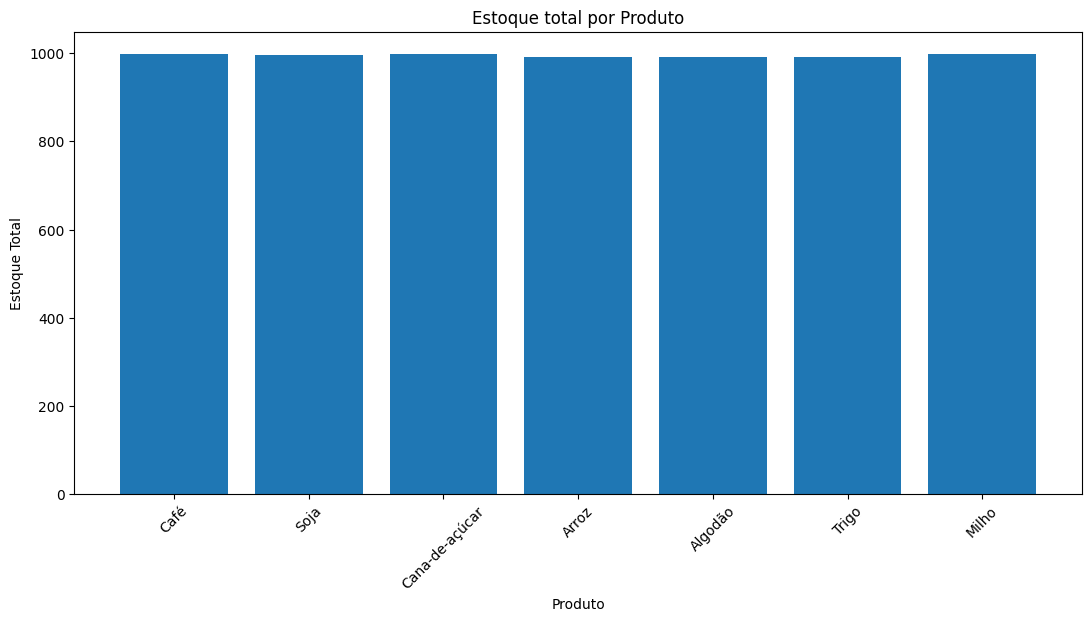

In [491]:
# Agora 'Produto' é coluna, não índice
plt.figure(figsize=(13, 6)) 
plt.bar(df['Produto'], df['Estoque'])
plt.xlabel('Produto')
plt.ylabel('Estoque Total')
plt.title('Estoque total por Produto')
plt.xticks(rotation=45)
plt.show()

# Fim da parte de limpeza e tratamento de dados!!!